In [0]:
from google.colab import drive
drive.mount('/content/drive/')


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
import os
os.chdir("/content/drive/My Drive/Derin Öğrenme/AutoEncoders/mnist_Autoencoder/cnn/cnn AE")
!pwd

/content/drive/My Drive/Derin Öğrenme/AutoEncoders/mnist_Autoencoder/cnn/cnn AE


In [7]:
!ls

CNN_Autoencoder.ipynb


In [0]:
!pip install -q keras

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [10]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
"""
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))"""
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [12]:
!tensorboard --logdir=tmp/autoencoder

2020-05-05 13:20:18.312126: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.1 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/util.py", line 296, in _exit_function
    _run_finalizers(0)
  File "/usr/lib/python3.6/multiprocessing/util.py", line 246, in _run_finalizers
    f = lambda p : p[0] is not None and p[0] >= minpriority
KeyboardInterrupt


In [14]:
from keras.callbacks import TensorBoard

hist=autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 88us/step - loss: 0.2134 - val_loss: 0.1721
Epoch 2/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1558 - val_loss: 0.1425
Epoch 3/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1396 - val_loss: 0.1372
Epoch 4/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1321 - val_loss: 0.1315
Epoch 5/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1273 - val_loss: 0.1239
Epoch 6/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1237 - val_loss: 0.1218
Epoch 7/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1212 - val_loss: 0.1164
Epoch 8/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1190 - val_loss: 0.1157
Epoch 9/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1173 - val_loss: 0.1

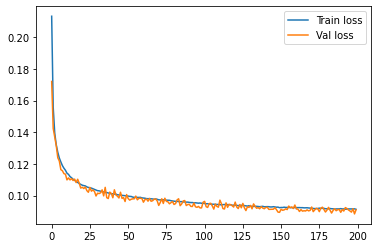

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()# labelların gözükmesini sağlamak
plt.show()

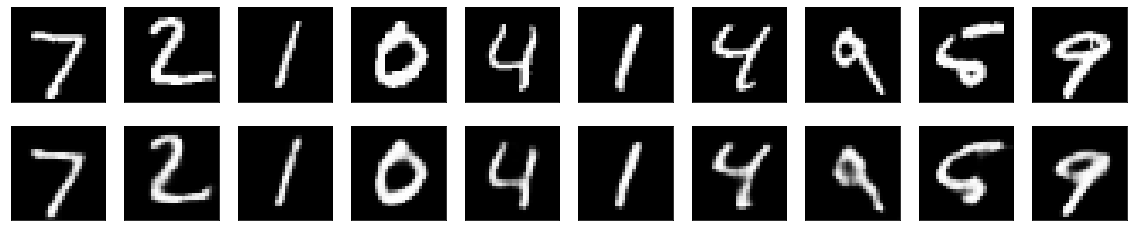

In [16]:
import matplotlib.pyplot as plt
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()